In [0]:
#Flow chart of extraction 

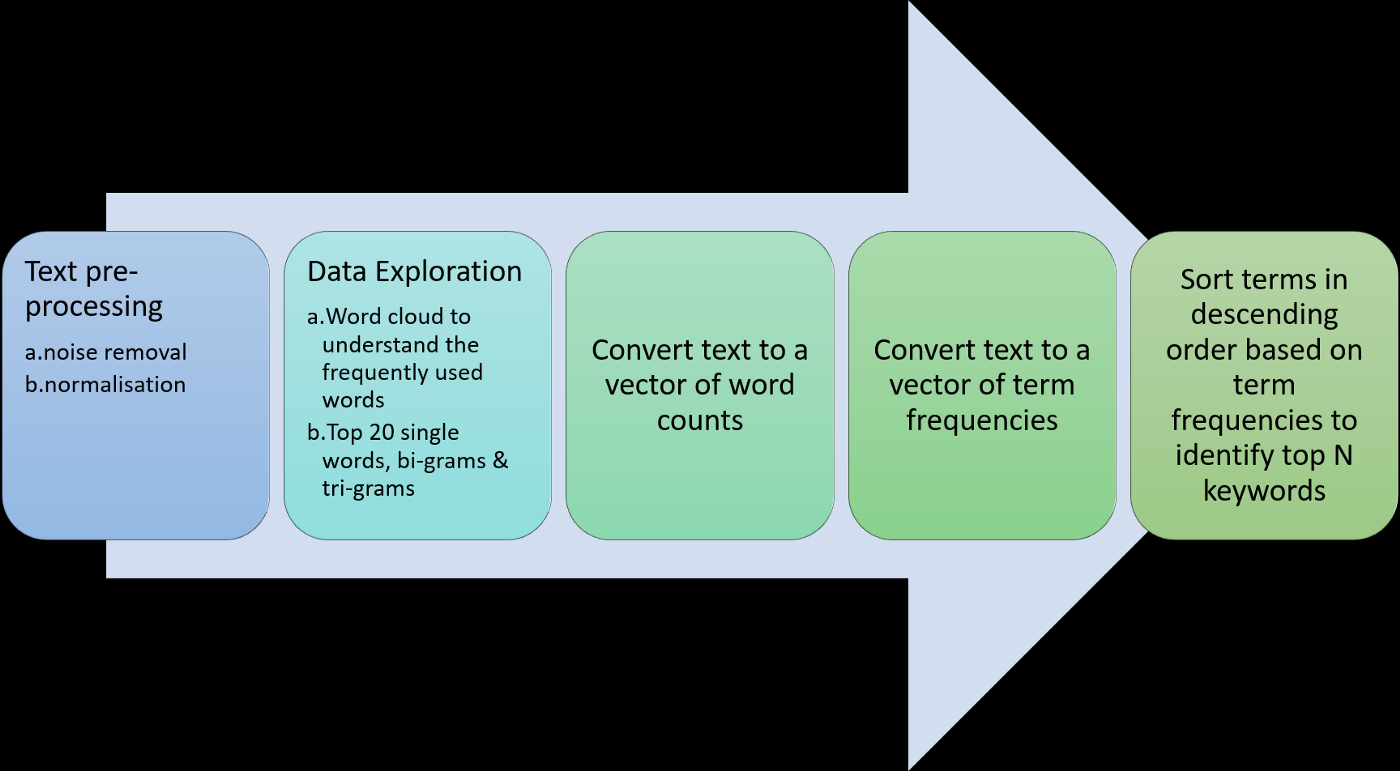

In [0]:
import pandas as pd
import numpy as np
import os
import re

In [0]:
path_to_drive = "drive/My Drive"
path_to_data = os.path.join(path_to_drive,"chatbot/data")
path_to_data_folder = os.path.join(path_to_data,'Build html documentation')
data_filename1 = "idsngdocumentation.docx"
data_filename = "_toc.json"
path_to_kernel = os.path.join(path_to_drive,"chatbot/1_important_keywords")

In [0]:
!pip install python-docx

In [0]:
import docx
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)
data = getText(os.path.join(path_to_data,data_filename1)) 

print(data)

IDesignSpec (c) 2007-2020 Agnisys, Inc.



Table of contents
	20
	20
	20
	24
	24
	28
	31
	41
	47
	52
	55
	57
	59
	61
	63
	65
	68
	71
	73
	75
	77
	78
	81
	83
	86
	86
	93
	95
	97
	98
	100
	100
	100
	102
	106
	106
	108
	108
	112
	115
	119
	119
	120
	120
	122
	125
	126
	137
	139
	144
	145
	149
	150
	152
	169
	171
	176
	178
	183
	184
	186
	187
	189
	189
	193
	197
	200
	205
	209
	210
	211
	213
	214
	217
	218
	223
	226
	227
	228
	234
	235
	236
	236
	251
	251
	261
	271
	280
	282
	286
	305
	311
	312
	314
	315
	315
	316
	321
	323
	324
	325
	326
	327
	328
	330
	333
	336
	338
	338
	346
	354
	364
	371
	372
	377
	378
	379
	380
	382
	386
	387
	388
	391
	401
	403
	407
	408
	409
	410
	414
	416
	418
	419
	425
	427
	429
	431
	431
	435
	441
	444
	447
	450
	452
	456
	456
	480
	484
	491
	491
	494
	497
	500
	506
	509
	510
	513
	513
	514
	527
	529
	529
	535
	555
	555
	560
	572
	576
	578
	578
	591
	592
	595
	597
	600
	601
	602
	613
	618
	622
	622
	622
	630
	633
	638
	643
	648
	655
	656
	660
	664
	672
	685
	689

In [0]:
#cleaning examples from the text
data = re.sub('example.*?\s(?=Created with the Personal Edition of HelpNDoc)',' ',data)

In [0]:
#Reading from json 
import json
with open(os.path.join(path_to_data_folder,data_filename),'r') as f:
    hrchy = json.load(f)

In [0]:
def process_html(text):
    text = re.sub("\n",' ',text)
    text = re.sub('<.*?>',' ',text)
    text = re.sub('{.*?}',' ',text)
    text = re.sub("Created with the Personal Edition of HelpNDoc.*",'',text)
    text = re.sub("@.*?}",' ',text)
    text = re.sub("\s+",' ',text)
    return text

In [0]:
def read_text_from_xml_and_process(filename_path):
    with open(filename_path,'r',encoding='utf-8') as f:
        text = f.read()
    text = process_html(text)
    return text

#extracting documents
for i,item in enumerate(hrchy):
    text = read_text_from_xml_and_process(os.path.join(path_to_data_folder,item['a_attr']['href']))
    item['raw_text'] = text
    hrchy[i] = item

In [0]:
#dataframe
dataset = pd.DataFrame(hrchy)
dataset.head()

,id,parent,text,a_attr,icon,raw_text
0,CopyrightNotice,#,Copyright Notice,{'href': 'CopyrightNotice.html'},icon-10,Copyright Notice nav Skip to main content Tog...
1,ReleaseNotes,#,Release Notes,{'href': 'ReleaseNotes.html'},NaN,Release Notes nav Skip to main content Toggle...
2,Ver63200,ReleaseNotes,Ver 6.32.0.0,{'href': 'Ver63200.html'},NaN,Ver 6.32.0.0 nav Skip to main content Toggle ...
3,PriorReleaseNotes,ReleaseNotes,Prior Release Notes,{'href': 'PriorReleaseNotes.html'},NaN,Prior Release Notes nav Skip to main content ...
4,Ver624xx,PriorReleaseNotes,Ver 6.24.x.x,{'href': 'Ver624xx.html'},icon-8,Ver 6.24.x.x nav Skip to main content Toggle ...


In [0]:
#creating dataset
dataset['word_count'] = dataset['raw_text'].apply(lambda x :len(str(x).split(" ")))
dataset.head()

,id,parent,text,a_attr,icon,raw_text,word_count
0,CopyrightNotice,#,Copyright Notice,{'href': 'CopyrightNotice.html'},icon-10,Copyright Notice nav Skip to main content Tog...,32
1,ReleaseNotes,#,Release Notes,{'href': 'ReleaseNotes.html'},NaN,Release Notes nav Skip to main content Toggle...,33
2,Ver63200,ReleaseNotes,Ver 6.32.0.0,{'href': 'Ver63200.html'},NaN,Ver 6.32.0.0 nav Skip to main content Toggle ...,1537
3,PriorReleaseNotes,ReleaseNotes,Prior Release Notes,{'href': 'PriorReleaseNotes.html'},NaN,Prior Release Notes nav Skip to main content ...,31
4,Ver624xx,PriorReleaseNotes,Ver 6.24.x.x,{'href': 'Ver624xx.html'},icon-8,Ver 6.24.x.x nav Skip to main content Toggle ...,1672


In [0]:
dataset.shape

(432, 7)

In [0]:
#descriptive statistics of word counts
dataset.word_count.describe()

count     432.000000
mean      574.342593
std       871.323914
min        21.000000
25%       124.500000
50%       283.000000
75%       654.000000
max      7410.000000
Name: word_count, dtype: float64

In [0]:
#identifying most common words
freq = pd.Series(" ".join(dataset['raw_text']).split()).value_counts()[:20].keys().tolist()
print(freq)

['&nbsp;', 'the', 'to', 'in', 'of', 'is', 'and', 'for', ':', '.', 'a', 'be', 'register', 'can', '=', 'or', 'property', 'The', 'on', 'are']


In [0]:
#identifying uncommon words
freq1 = pd.Series(" ".join(dataset['text']).split()).value_counts()[-40:]
freq1

Topics                1
UserDefined           1
Perl                  1
Comments              1
Constraints           1
Inserting             1
external              1
Technology            1
RegModel              1
SoC                   1
AXI                   1
If-else               1
References            1
Diff                  1
MultipleBusDomains    1
AMBA-AXI              1
Async                 1
WISHBONE              1
Ralgen                1
We                    1
variables             1
Third                 1
Postprocessor         1
Arguments             1
Changes               1
NextGen               1
Parameterization      1
AMBA-AXI4FULL         1
Arrays                1
Copyright             1
HDL_PATH_GATE         1
Using                 1
started               1
uvm.regmodel          1
Inside                1
SpecialReg            1
Multi-Dimensional     1
Button                1
Control               1
Parameters            1
dtype: int64

#text pre-processing
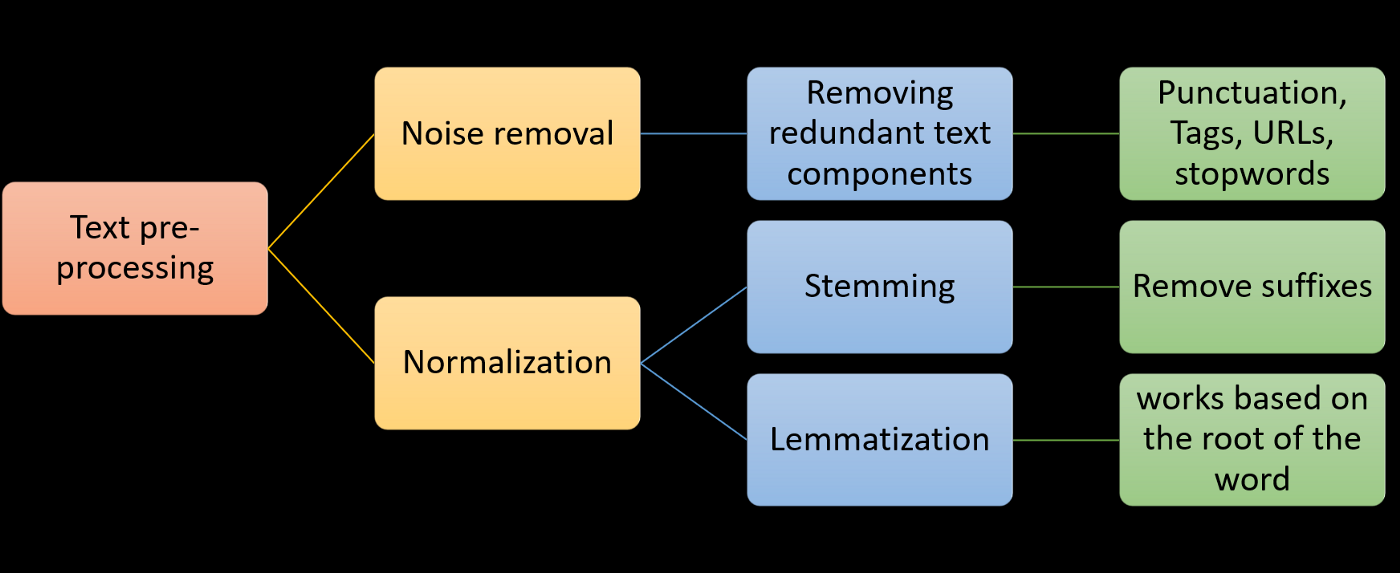

In [0]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

lem = WordNetLemmatizer()
stem = PorterStemmer()

word = "alias"

print("lemmatization:",lem.lemmatize(word,'v'))
print("stemming:",stem.stem(word))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
lemmatization: alias
stemming: alia


In [0]:
#stopwords :: list
stop_words = set(stopwords.words("english"))

#adding custom words
stop_words = stop_words.union(freq1)


In [0]:


def preprocess(text):
  #removing punctauations
  # text = re.sub('[^a-zA-Z]',' ',text)
  text = re.sub(' \S+[._]\S+ ',' ',text)
  text = re.sub('[^a-zA-Z]',' ',text)
  # text = re.sub('',' ',text)
  # text = re.sub('',' ',text)
  # text = re.sub('',' ',text)
  #converts to lower
  text = text.lower()
  #removing tags
  text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)
  #removing special characters and digits
  text = re.sub("(\\d|\\W)+"," ",text)
  
  #lemmatization
  lem = WordNetLemmatizer()
  text = [lem.lemmatize(w) for w in text.split(" ") if not w in stop_words]
  text = " ".join(text)
  return text
  

#lets preprocess text data in dataset
dataset["processed"] = dataset.text.apply(lambda x: preprocess(x)) 


In [0]:
#head dataset
dataset.head()

,id,parent,text,a_attr,icon,raw_text,word_count,processed
0,CopyrightNotice,#,Copyright Notice,{'href': 'CopyrightNotice.html'},icon-10,Copyright Notice nav Skip to main content Tog...,32,copyright notice
1,ReleaseNotes,#,Release Notes,{'href': 'ReleaseNotes.html'},NaN,Release Notes nav Skip to main content Toggle...,33,release note
2,Ver63200,ReleaseNotes,Ver 6.32.0.0,{'href': 'Ver63200.html'},NaN,Ver 6.32.0.0 nav Skip to main content Toggle ...,1537,ver
3,PriorReleaseNotes,ReleaseNotes,Prior Release Notes,{'href': 'PriorReleaseNotes.html'},NaN,Prior Release Notes nav Skip to main content ...,31,prior release note
4,Ver624xx,PriorReleaseNotes,Ver 6.24.x.x,{'href': 'Ver624xx.html'},icon-8,Ver 6.24.x.x nav Skip to main content Toggle ...,1672,ver x x


In [0]:
#identifying most common words
freq = pd.Series(" ".join(dataset['processed']).split()).value_counts()[:20].keys().tolist()
print(freq)

['register', 'property', 'ver', 'uvm', 'id', 'getting', 'x', 'started', 'arv', 'custom', 'license', 'sequence', 'c', 'idsexcel', 'amba', 'idsword', 'signal', 'header', 'block', 'output']


In [0]:
#fetching corpus and vie corpus item
corpus = dataset.processed.to_list() #processed
corpus[234]

'multiple bus domain'

# Data Exploration

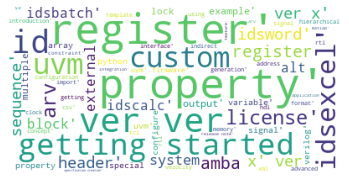

In [0]:
#lets visualize
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=STOPWORDS,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

# Text Preparation

In [0]:
import string
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import re, string, unicodedata
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

def Normalize(text):
    remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
    #word tokenization
    word_token = nltk.word_tokenize(text.lower().translate(remove_punct_dict)) #.translate(remove_punct_dict)
    # word_token = [ w for w in word_token if "_" not in w]
    #remove ascii
    new_words = []
    for word in word_token:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    
    #Remove tags
    rmv = []
    for w in new_words:
        text=re.sub("&lt;/?.*?&gt;","&lt;&gt;",w)
        rmv.append(text)
        
    #pos tagging and lemmatization
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    lmtzr = WordNetLemmatizer()
    lemma_list = []
    rmv = [i for i in rmv if i]
    for token, tag in nltk.pos_tag(rmv):
        lemma = lmtzr.lemmatize(token, tag_map[tag[0]])
        lemma_list.append(lemma)
    return lemma_list



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
weights={}

In [0]:
#creating a vector if word counts
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(tokenizer = Normalize, max_df=0.9,stop_words=stop_words,max_features=1000,ngram_range=(1,3))
X = cv.fit_transform(corpus)

In [0]:
weights["countvectorizer"] = {'tokenizer':'Normalize',
                              'max_df':0.8,
                              'max_features':10000,
                              'X':X,
                              'cv':cv}

In [0]:
#view list of words
print(list(cv.vocabulary_.keys()))

['copyright', 'notice', 'copyright notice', 'release', 'note', 'release note', 'ver', 'prior', 'prior release', 'prior release note', 'x', 'ver x', 'x x', 'ver x x', 'introduction', 'benefit', 'capability', 'benefit capability', 'basic', 'concept', 'basic concept', 'address', 'unit', 'address unit', 'system', 'software', 'requirement', 'system software', 'software requirement', 'system software requirement', 'idsword', 'idsexcel', 'idsword idsexcel', 'idsbatch', 'idscalc', 'upgrade', 'id', 'upgrade id', 'stop', 'button', 'stop button', 'licensing', 'node', 'lock', 'license', 'node lock', 'lock license', 'node lock license', 'editor', 'editor license', 'float', 'float license', 'open', 'evaluation', 'open evaluation', 'evaluation license', 'open evaluation license', 'troubleshoot', 'debug', 'id debug', 'get', 'start', 'get start', 'start idsword', 'get start idsword', 'sample', 'track', 'change', 'track change', 'agni', 'library', 'agni library', 'dynamic', 'name', 'dynamic name', 'star

# Visualizing top n 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(0, 0, 'register'),
 Text(0, 0, 'property'),
 Text(0, 0, 'ver'),
 Text(0, 0, 'uvm'),
 Text(0, 0, 'id'),
 Text(0, 0, 'getting'),
 Text(0, 0, 'started'),
 Text(0, 0, 'arv'),
 Text(0, 0, 'custom'),
 Text(0, 0, 'idsexcel'),
 Text(0, 0, 'license'),
 Text(0, 0, 'sequence'),
 Text(0, 0, 'idsword'),
 Text(0, 0, 'header'),
 Text(0, 0, 'amba'),
 Text(0, 0, 'signal'),
 Text(0, 0, 'system'),
 Text(0, 0, 'idscalc'),
 Text(0, 0, 'external'),
 Text(0, 0, 'block')]

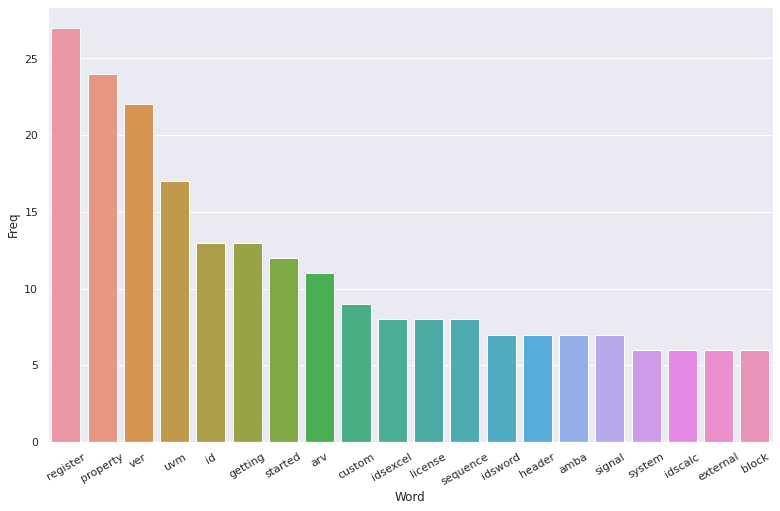

In [0]:
#unigram
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                   Bi-gram  Freq
0          getting started    12
1             release note     3
2   specification creation     3
3                 hdl path     3
4           system verilog     3
5            basic concept     2
6                node lock     2
7             lock license     2
8           editor license     2
9         floating license     2
10         open evaluation     2
11      evaluation license     2
12            agni library     2
13        started idsexcel     2
14        started idsbatch     2
15         started idscalc     2
16       external register     2
17      unregistered field     2
18           wide register     2
19               sv header     2


[Text(0, 0, 'getting started'),
 Text(0, 0, 'release note'),
 Text(0, 0, 'specification creation'),
 Text(0, 0, 'hdl path'),
 Text(0, 0, 'system verilog'),
 Text(0, 0, 'basic concept'),
 Text(0, 0, 'node lock'),
 Text(0, 0, 'lock license'),
 Text(0, 0, 'editor license'),
 Text(0, 0, 'floating license'),
 Text(0, 0, 'open evaluation'),
 Text(0, 0, 'evaluation license'),
 Text(0, 0, 'agni library'),
 Text(0, 0, 'started idsexcel'),
 Text(0, 0, 'started idsbatch'),
 Text(0, 0, 'started idscalc'),
 Text(0, 0, 'external register'),
 Text(0, 0, 'unregistered field'),
 Text(0, 0, 'wide register'),
 Text(0, 0, 'sv header')]

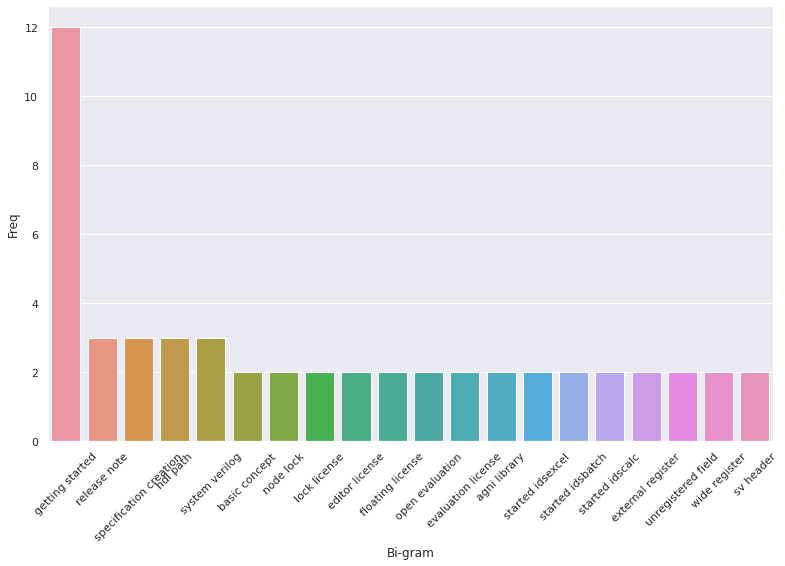

In [0]:
#bigram
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                        Tri-gram  Freq
0              node lock license     2
1        open evaluation license     2
2       getting started idsexcel     2
3       getting started idsbatch     2
4        getting started idscalc     2
5             prior release note     1
6    system software requirement     1
7        getting started idsword     1
8          external reg property     1
9      memory technology mapping     1
10     multiple interface memory     1
11            top level register     1
12  level register specification     1
13    register specification soc     1
14   import userdefined property     1
15       trigger buffer register     1
16             custom code block     1
17            sv header property     1
18       protection property axi     1
19              property axi apb     1


[Text(0, 0, 'node lock license'),
 Text(0, 0, 'open evaluation license'),
 Text(0, 0, 'getting started idsexcel'),
 Text(0, 0, 'getting started idsbatch'),
 Text(0, 0, 'getting started idscalc'),
 Text(0, 0, 'prior release note'),
 Text(0, 0, 'system software requirement'),
 Text(0, 0, 'getting started idsword'),
 Text(0, 0, 'external reg property'),
 Text(0, 0, 'memory technology mapping'),
 Text(0, 0, 'multiple interface memory'),
 Text(0, 0, 'top level register'),
 Text(0, 0, 'level register specification'),
 Text(0, 0, 'register specification soc'),
 Text(0, 0, 'import userdefined property'),
 Text(0, 0, 'trigger buffer register'),
 Text(0, 0, 'custom code block'),
 Text(0, 0, 'sv header property'),
 Text(0, 0, 'protection property axi'),
 Text(0, 0, 'property axi apb')]

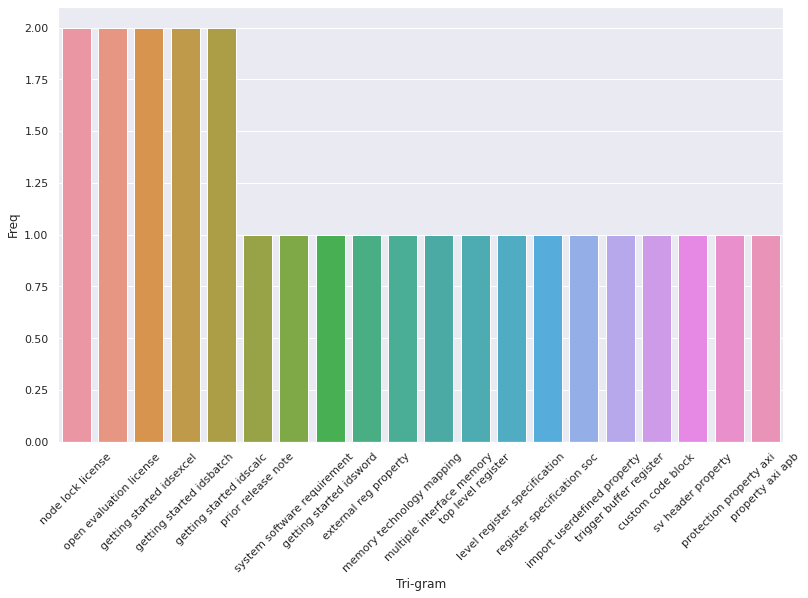

In [0]:
#trigram
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

#scoring keywords
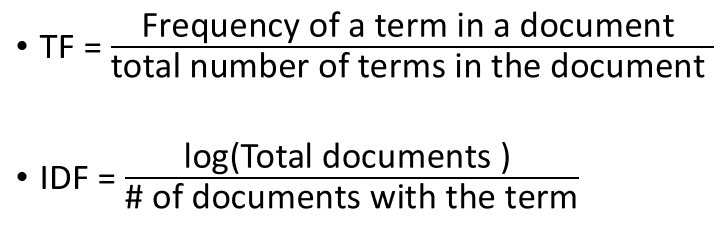

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
transformer.fit(X)

#get feature names
feature_names = cv.get_feature_names()

#fetch the document for which keywords need to be extracted
doc = """what is alias register ?
"""#corpus[12]
doc = preprocess(doc)

# doc = [preprocess(d) for d in corpus]

#generate tf-idf for the given document
tf_idf_vector = transformer.transform(cv.transform([doc]))

In [0]:
# weights['transformer'] = {'transformer':transformer,
#                           }

In [0]:
# Based on the TF-IDF scores, we can extract the words with the highest scores to get the keywords for a document.

In [0]:
#sorting tf_idf in desc order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
  tuples = zip(coo_matrix.col,coo_matrix.data)
  return sorted(tuples, key=lambda x : (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=1000):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,1000)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
alias register 

Keywords:
alias register 0.647
alias 0.647
register 0.405


In [0]:
#getting top n words
keywords=[]
for item in corpus:
     tf_idf_vector=transformer.transform(cv.transform([item]))
     sorted_items=sort_coo(tf_idf_vector.tocoo())
     keyl = extract_topn_from_vector(feature_names,sorted_items,10000)
     keyw=[key for key in keyl.keys()]
     keywords.append(keyw)

wordfreq = {}
for item in keywords:
  for name in item:
    if not name in wordfreq:
      wordfreq[name] = 1
      continue
    wordfreq[name] += 1
# for i in range(len(keywords)):
#     item = keywords[i]
#     wojoi = ' '.join(item)
#     keywords[i] = wojoi
      

In [0]:
wordfreq =  sorted(wordfreq.items(), key= lambda x :x[1], reverse = True)

In [0]:
wordfreq

[('register', 27),
 ('property', 24),
 ('ver', 22),
 ('uvm', 17),
 ('start', 13),
 ('get', 13),
 ('id', 12),
 ('get start', 12),
 ('arv', 11),
 ('custom', 9),
 ('idsexcel', 8),
 ('license', 8),
 ('sequence', 8),
 ('idsword', 7),
 ('c', 7),
 ('header', 7),
 ('signal', 7),
 ('x', 6),
 ('x x', 6),
 ('ver x x', 6),
 ('ver x', 6),
 ('system', 6),
 ('idscalc', 6),
 ('external', 6),
 ('define', 6),
 ('rtl', 6),
 ('amba', 6),
 ('output', 6),
 ('address', 5),
 ('idsbatch', 5),
 ('array', 5),
 ('memory', 5),
 ('interface', 5),
 ('block', 5),
 ('template', 5),
 ('configuration', 5),
 ('verilog', 5),
 ('alt', 5),
 ('example', 5),
 ('format', 5),
 ('firmware', 5),
 ('note', 4),
 ('lock', 4),
 ('specification', 4),
 ('multiple', 4),
 ('variable', 4),
 ('import', 4),
 ('bus', 4),
 ('xml', 4),
 ('csv', 4),
 ('python', 4),
 ('tcl', 4),
 ('special', 4),
 ('error', 4),
 ('coverage', 4),
 ('configure', 4),
 ('feature', 4),
 ('release note', 3),
 ('release', 3),
 ('introduction', 3),
 ('concept', 3),
 ('ed

In [0]:
#saving
import pickle
with open(os.path.join(path_to_kernel,"keyword_extractor"),'wb') as f:
  pickle.dump(weights,f) 

Kmeans Clustering

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( tokenizer = Normalize,stop_words='english', max_df=0.8, ngram_range=(1,3),analyzer='word',max_features=1000) #
doc_vec = vectorizer.fit_transform(corpus)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'u'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [0]:
tdm = pd.DataFrame(doc_vec.toarray().transpose(), index = vectorizer.get_feature_names(), columns= [i for i in range(len(corpus))])
arr = np.array(tdm)

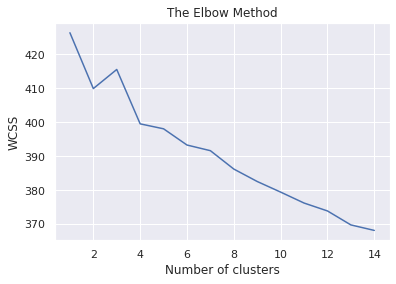

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline
def plot_elbow_graph(arr,km_init="k-means++"):
    """ helps in finding optimal no. of cluster"""
    wcss = []
    for i in range(1, 15):
        kmeans = KMeans(n_clusters = i, init = km_init, random_state = 42,max_iter = 100, n_init = 10) #random,k-means++
        kmeans.fit(arr)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 15), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    
plot_elbow_graph(arr=arr)

In [0]:
#lets see cluster at k=2
from collections import defaultdict
clustering = defaultdict(list)
terms = vectorizer.get_feature_names()
model = KMeans(n_clusters=6, init="k-means++", max_iter = 100, n_init=10)
model.fit(arr)

for idx, label in enumerate(model.labels_):
    clustering[label].append(terms[idx]) 

In [0]:
for i in range(0,6):
  print("cluster "+str(i+1)+"\n",clustering[i])

cluster 1
 ['interface']
cluster 2
 ['access', 'action', 'action p', 'action p component', 'address', 'address map', 'address sort', 'address unit', 'advanced', 'advanced rtl', 'advanced topic', 'advanced uvm', 'aggregation', 'aggregation logic', 'agni', 'agni library', 'ahb', 'ahb lite', 'ahblite', 'ahblite bus', 'alias', 'alias register', 'alias register different', 'alignment', 'alt', 'amba', 'amba ahb', 'amba ahb lite', 'amba ahblite', 'amba ahblite bus', 'amba amba', 'amba amba ahblite', 'amba apb', 'amba axi', 'apb', 'apb bus', 'api', 'application', 'application layout', 'application logic', 'application logic port', 'application note', 'argument', 'array', 'array argument', 'array indexing', 'array subsequence', 'array variable', 'arv', 'arv coverage', 'arv coverage report', 'arv formal', 'arv idsexcel', 'arv idsword', 'arv property', 'arv sequence', 'arv sim', 'assert', 'assignment', 'async', 'async fifo', 'auto', 'auto completion', 'automatic', 'automatic register', 'automatic

In [0]:
# saving cluster to a sheet with given n centres
import os
import time
import collections
def cluster(min=4,max=15,directory=str(time.time()).split('.')[0], km_init = "k-means++"):
    terms = vectorizer.get_feature_names()
    for n in range(min,max):
        model = KMeans(n_clusters=n, init=km_init, max_iter = 100, n_init=10)
        model.fit(doc_vec.transpose())

        clustering = collections.defaultdict(list)

        for idx, label in enumerate(model.labels_):
            clustering[label].append(terms[idx]) 
        if not os.path.isdir(directory):
            os.mkdir(directory)
        filename = "df_"+str(n)

        df = pd.DataFrame(columns = ('cluster_n','keywords','no.of words'))

        for key, value in clustering.items():
            cluster = key
            keyword =  ' '.join(value)
            length = len(value)

            df = df.append({'cluster_n':cluster,'keywords':str(keyword),'no.of words':length},ignore_index=True)
        df.to_excel(os.path.join(directory,filename+'.xlsx'))

In [0]:
cluster(min=2,max=8, km_init="k-means++", directory = "kmeans_per_dictsdsa") # give directory == directoryname  , km_init = ['random' or 'k-means++']
"""It will save all cluster with in range given in min and max, to directory name given or bydefault timestamp directory"""

'It will save all cluster with in range given in min and max, to directory name given or bydefault timestamp directory'

#introduce word2vec using gensims

In [0]:
#converting data into sentences
import nltk

sentences =[Normalize(preprocess(sent)) for data in corpus for sent in data.split('\n') ] 
# sentences =[nltk.word_tokenize(sent) for sent in sentences]
sentences =[sent for sent in sentences if sent]
print("length: ", len(sentences))

length:  430


In [0]:
sentences[123]

['verilog']

In [0]:
from gensim.models import Word2Vec

model = Word2Vec(sentences, min_count=1)

In [0]:
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

In [0]:
X=[]
for sentence in sentences:
  if sentence == " " or sentence == "":
    continue
  elif len(sentence) < 5:
    continue
  X.append(sent_vectorizer(sentence, model))   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [0]:
print (model[model.wv.vocab])

[[-0.00311254 -0.00144931  0.00169351 ... -0.00467178  0.0010496
  -0.00273505]
 [ 0.00098302  0.00081956 -0.00350866 ... -0.00104195 -0.00207764
   0.00251225]
 [-0.00097955  0.00128374 -0.00079252 ...  0.00311146 -0.00417578
   0.00469468]
 ...
 [-0.00441242 -0.00143309  0.00092105 ... -0.00093525  0.00478478
  -0.00018558]
 [ 0.00223264 -0.0008057  -0.00247214 ...  0.00330318  0.00178457
  -0.00259247]
 [ 0.00396383 -0.0045414   0.00368705 ...  0.00442726 -0.00252114
  -0.00020709]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [0]:
print (model.similarity('uvm','property'))
# print (model.wv.most_similar(positive=['amba'], negative=[], topn=2))

0.078023024


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
#let perform kmeans over sentences
X =np.array(X)
print(X.shape)
print(X[2])

(5, 100)
[ 2.1040358e-03  1.3230747e-04  9.7136748e-05  4.9075828e-04
  4.8833987e-04  1.1890625e-03  1.6149424e-04 -2.9081970e-03
 -9.2485984e-04  1.4205679e-03 -1.9753117e-03 -3.1359281e-04
 -1.9278035e-04  2.2085094e-04 -1.8937918e-03 -1.6622916e-03
  1.3109492e-03 -6.2070513e-04  1.2255966e-03  1.2546867e-03
 -1.1446576e-03  2.9730673e-03  8.8813441e-04  2.9150161e-04
 -6.1293237e-04  1.5489856e-03 -1.5851120e-03  2.5867065e-04
 -2.5596051e-04  1.0659056e-03 -3.0474892e-04  3.0560594e-03
 -2.6028024e-03  8.6461537e-04  2.9988374e-04 -1.6706657e-03
 -9.4513252e-04 -2.5165696e-03  8.1451359e-04 -3.5960991e-03
  9.2923496e-04  4.9569714e-04 -1.8978646e-05 -2.1410536e-03
 -8.9105725e-04  1.1678422e-03  1.5873127e-03 -2.7055683e-04
  1.4470657e-03 -1.1602268e-03 -7.1958086e-04 -2.2501245e-03
 -8.4651727e-04  2.3304550e-03 -3.9478105e-05 -1.9990420e-03
  8.3110092e-04 -6.8385643e-04  3.4965857e-04 -2.4582334e-03
  1.3345944e-03 -6.7535392e-04 -3.8195684e-04 -1.8270774e-03
 -1.9029028e-03

In [0]:
#Y for over word vectors
vocab = list(model.wv.vocab)
print(vocab)

Y_ = []
for w in vocab:
  Y_.append(model[w])

Y = np.array(Y_)
print(Y.shape," shape")
print(len(Y)," length")


['copyright', 'notice', 'release', 'note', 'ver', 'prior', 'x', 'introduction', 'benefit', 'capability', 'basic', 'concept', 'address', 'unit', 'system', 'software', 'requirement', 'idsword', 'idsexcel', 'idsbatch', 'idscalc', 'upgrade', 'id', 'stop', 'button', 'licensing', 'node', 'lock', 'license', 'editor', 'float', 'open', 'evaluation', 'troubleshoot', 'debug', 'get', 'start', 'sample', 'track', 'change', 'agni', 'library', 'dynamic', 'name', 'specification', 'creation', 'register', 'access', 'external', 'reg', 'property', 'type', 'unregistered', 'field', 'wide', 'registergroup', 'reggroups', 'alignment', 'array', 'memory', 'technology', 'mapping', 'repeat', 'multiple', 'interface', 'top', 'level', 'soc', 'board', 'chip', 'block', 'enum', 'define', 'ref', 'refvariant', 'variable', 'hierarchical', 'design', 'variant', 'custom', 'template', 'import', 'userdefined', 'exclude', 'trigger', 'buffer', 'configuration', 'general', 'rtl', 'uvm', 'code', 'c', 'sv', 'header', 'isequencespec', 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:

from nltk.cluster import KMeansClusterer
NUM_CLUSTERS=2
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(Y_, assign_clusters=True) #X for sentence clustering
print (assigned_clusters)
  
  
  
# for index, sentence in enumerate(sentences):    
#     print (str(assigned_clusters[index]) + ":" + str(sentence))

#for words
for index, sentence in enumerate(vocab):    
    print (str(assigned_clusters[index]) + ":" + str(vocab))

[1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 

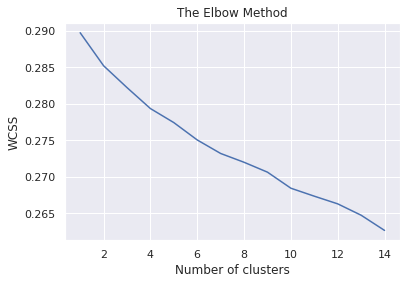

In [0]:
#plot elbow graph    
plot_elbow_graph(arr=Y)

In [0]:
from collections import defaultdict
clustering = defaultdict(list)
n=4
terms = vocab
model = KMeans(n_clusters=n, init="k-means++", max_iter = 100, n_init=10)
model.fit(Y)

for idx, label in enumerate(model.labels_):
    clustering[label].append(terms[idx]) 

In [0]:
for i in range(0,n):
  print("cluster "+str(i+1)+"\n",clustering[i])

cluster 1
 ['prior', 'capability', 'idsbatch', 'stop', 'licensing', 'node', 'editor', 'float', 'sample', 'property', 'mapping', 'repeat', 'multiple', 'interface', 'level', 'buffer', 'sv', 'amba', 'signal', 'auto', 'completion', 'xact', 'xml', 'support', 'wishbone', 'verification', 'html', 'pre', 'global', 'aggregation', 'svif', 'elem', 'virtual', 'different', 'ro', 'pair', 'indexing', 'inside', 'soft', 'parameterization', 'crc', 'widget', 'ispresent', 'application', 'basicsample', 'reference', 'spec', 'idscloud', 'branching', 'condition', 'operator', 'return', 'assert', 'consolidate', 'optimize', 'hint', 'infact', 'component', 'collector']
cluster 2
 ['notice', 'concept', 'address', 'system', 'software', 'idscalc', 'id', 'start', 'specification', 'access', 'alignment', 'block', 'hierarchical', 'design', 'custom', 'exclude', 'general', 'rtl', 'c', 'udps', 'sw', 'dependency', 'dependent', 'ip', 'csv', 'output', 'systemverilog', 'duolog', 'ahb', 'proprietary', 'time', 'information', 'alt'

In [0]:
labels = model.labels_
centroids = model.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (model.score(X))


Cluster id labels for inputted data
[3 1 3 2 3 0 3 2 2 0 2 1 1 3 1 1 3 3 2 0 1 2 1 0 3 0 0 2 2 0 0 2 2 3 3 3 1
 0 3 2 2 2 2 2 1 3 2 1 2 2 0 3 2 2 3 2 2 1 2 2 3 0 0 0 0 3 0 2 3 2 1 2 3 2
 2 2 1 1 2 1 2 3 3 1 2 0 3 1 1 2 3 1 0 2 2 3 2 1 3 2 2 3 0 2 1 2 2 2 2 3 0
 0 0 3 1 1 2 3 1 0 0 2 2 1 3 1 2 2 3 1 2 1 0 2 1 3 2 2 0 1 1 1 2 2 2 2 3 0
 3 2 3 1 3 0 3 1 1 2 3 2 3 1 3 3 1 2 1 3 2 1 3 0 1 2 3 1 1 3 3 3 2 3 3 1 0
 2 3 0 1 2 2 3 0 0 2 3 3 3 3 1 3 2 1 3 1 1 0 3 3 3 3 0 2 2 2 2 2 2 1 3 3 2
 0 1 0 3 1 3 3 0 0 1 2 0 3 3 1 2 0 3 3 1 1 0 2 0 3 0 3 1 2 2 2 0 2 3 1 1 0
 2 3 3 0 1 2 1 3 2 2 1 3 1 3 3 2 2 2 1 3 2 1 1 2 3 1 1 2 2 2 0 1 2 3 3 0 2
 2 3 3 1 1 0 2 0 2 0 3 3 3 2 2 3 2 2 2 0 0 0 2 3 0 2 3 0 3 2 0 2 3 3 2 3 2
 3 1 3 0 2 3 2 1 1 2 1 2 1 0 2]
Centroids data
[[ 0.00016747  0.00105699 -0.00074887  0.00133657 -0.00049062 -0.00016275
   0.00035282 -0.00039373 -0.00090416  0.00086665 -0.00084078 -0.0001313
   0.00006211 -0.00079708 -0.00071389 -0.00045515  0.00053451 -0.00112302
  -0.0005435   0.0011

In [0]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)

ValueError: ignored

1 copyright
1 notice
1 release
0 note
0 ver
0 prior
1 x
1 introduction
1 benefit
0 capability
0 basic
0 concept
0 address
1 unit
0 system
0 software
0 requirement
0 idsword
1 idsexcel
0 idsbatch
1 idscalc
0 upgrade
1 id
0 stop
1 button
1 licensing
1 node
0 lock
0 license
0 editor
0 float
1 open
1 evaluation
1 troubleshoot
0 debug
0 get
1 start
1 sample
0 track
0 change
0 agni
1 library
1 dynamic
0 name
1 specification
1 creation
0 register
0 access
0 external
1 reg
1 property
1 type
0 unregistered
1 field
1 wide
1 registergroup
1 reggroups
0 alignment
1 array
0 memory
1 technology
0 mapping
1 repeat
0 multiple
0 interface
0 top
0 level
1 soc
0 board
1 chip
1 block
1 enum
0 define
0 ref
1 refvariant
0 variable
0 hierarchical
0 design
0 variant
1 custom
1 template
0 import
0 userdefined
0 exclude
1 trigger
0 buffer
1 configuration
1 general
1 rtl
0 uvm
1 code
0 c
0 sv
0 header
0 isequencespec
0 ipxact
1 systemrdl
0 udps
0 protection
1 axi
1 apb
0 bus
1 amba
1 ahblite
0 sw
1 bit
0 enable


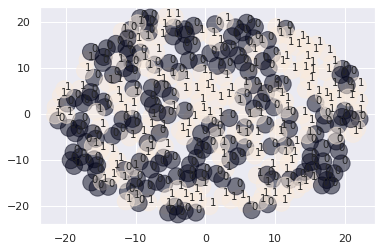

In [0]:
#plotting using t-SNE
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
 
tmodel = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=tmodel.fit_transform(Y)
 
 
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
 
 
for j in range(len(vocab)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   print ("%s %s" % (assigned_clusters[j],  vocab[j]))
 
 
plt.show()